In [ ]:
NAME: Akash Mishra
ROLL NO : 36
CLASS : BE IT (B2)
TITLE : :Implementing Feed forward neural networks with Keras and TensorFlow 
            a. Import the necessary packages 
            b. Load the training and testing data(MNIST/CIFAR10) 
            c. Define the network architecture using Keras 
            d. Train the model using SGD 
            e. Evaluate the network 
            f. Plot the training loss and accuracy

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [6]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [8]:
len(x_train)

60000

In [10]:
len(x_test)

10000

In [12]:
len(y_train)

60000

In [14]:
len(y_test)

10000

In [16]:
x_train.shape

(60000, 28, 28)

In [18]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

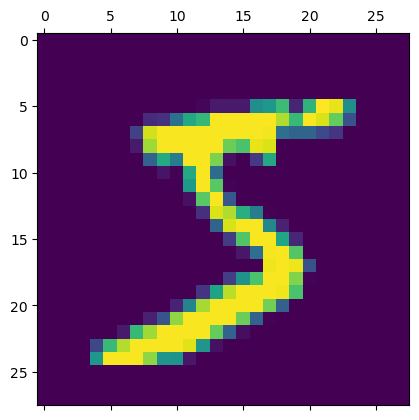

In [20]:
plt.matshow(x_train[0])

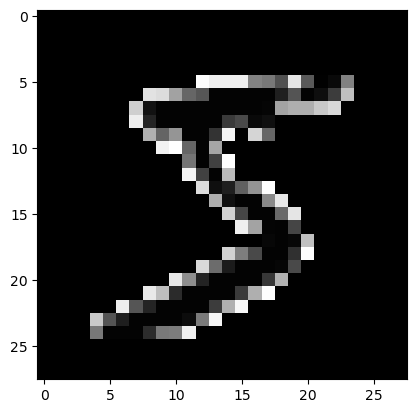

In [22]:
plt.imshow(-x_train[0], cmap="gray")

In [24]:
x_train = x_train / 255
x_test = x_test /255

In [26]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [28]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)),   #INPUT LAYER
    keras.layers.Dense(128, activation="relu"),      #HIDDEN LAYER
    keras.layers.Dense(10, activation="softmax")     #OUTPUT LAYER
])
model.summary()

C:\Users\AKASH\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ flatten (Flatten)             │ (None, 784)           │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense (Dense)                 │ (None, 128)           │      100,480 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_1 (Dense)               │ (None, 10)            │        1,290 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
model.compile(
    optimizer="sgd",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
history = model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))

Epoch 1/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8366 - loss: 0.6455 - val_accuracy: 0.9013 - val_loss: 0.3559
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9061 - loss: 0.3357 - val_accuracy: 0.9172 - val_loss: 0.2926
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9181 - loss: 0.2890 - val_accuracy: 0.9260 - val_loss: 0.2604
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9267 - loss: 0.2592 - val_accuracy: 0.9336 - val_loss: 0.2383
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9334 - loss: 0.2368 - val_accuracy: 0.9366 - val_loss: 0.2214
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9388 - loss: 0.2186 - val_accuracy: 0.9407 - val_loss: 0.2038
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9432 - loss: 0.2031 - val_accuracy: 0.9451 - val_loss: 0.1936
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9466 - loss: 0.1902 - 

In [56]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss= ",test_loss)
print("Accuracy ",test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9463 - loss: 0.1821
Loss=  0.18212896585464478
Accuracy  0.9463000297546387


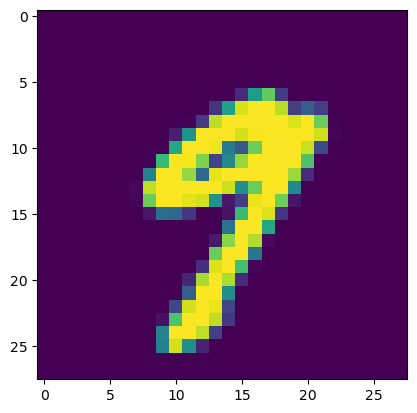

In [65]:
n= 20
plt.imshow(x_test[n])
plt.show()

In [67]:
#WE USE PREDICT() ON NEW DATA
predicted_value=model.predict(x_test)
print("Actual Number: ",np.argmax(y_test[n]))
print("Predicted Number: ", np.argmax(predicted_value[n]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Actual Number:  0
Predicted Number:  9


In [69]:
history = history.history
history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

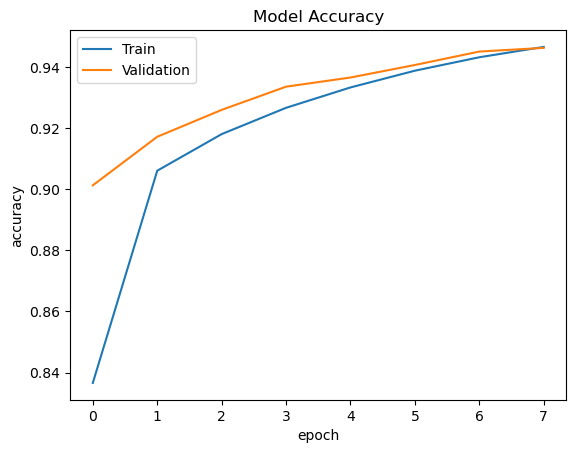

In [71]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', "Validation"], loc='upper left')
plt.show()

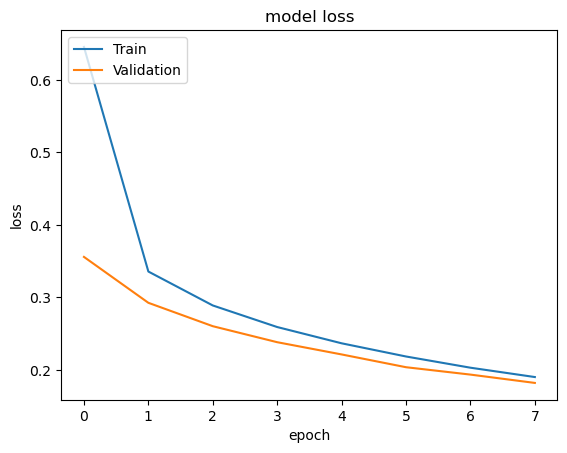

In [73]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

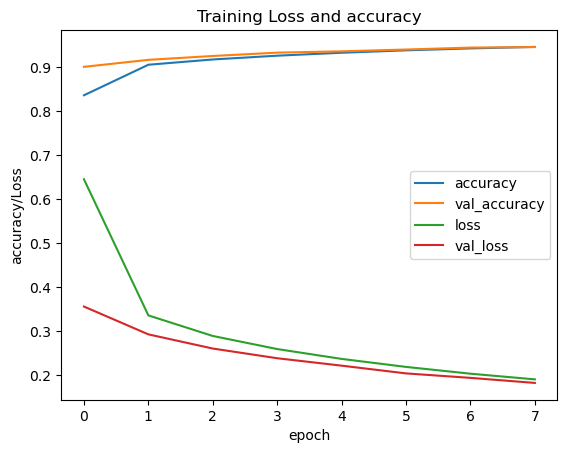

In [75]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'])